**READING DATA**




In [30]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from math import sqrt
import operator
df = pd.read_csv("/content/dataKNN.csv")
df.shape

(768, 9)

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             765 non-null    float64
 4   Insulin                   764 non-null    float64
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


Data Description


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,763.0,3.855832,3.370036,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,763.0,69.458716,18.757656,0.000,64.00000,72.0000,80.00000,122.00
SkinThickness,765.0,20.583007,15.947639,0.000,0.00000,23.0000,32.00000,99.00
Insulin,764.0,80.086387,115.434618,0.000,0.00000,34.0000,128.25000,846.00
BMI,763.0,31.997248,7.908138,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,762.0,33.240157,11.785035,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [34]:
print(df.isnull().sum())

Pregnancies                 5
Glucose                     0
BloodPressure               5
SkinThickness               3
Insulin                     4
BMI                         5
DiabetesPedigreeFunction    0
Age                         6
Outcome                     0
dtype: int64


**DATA VISUALISATION**

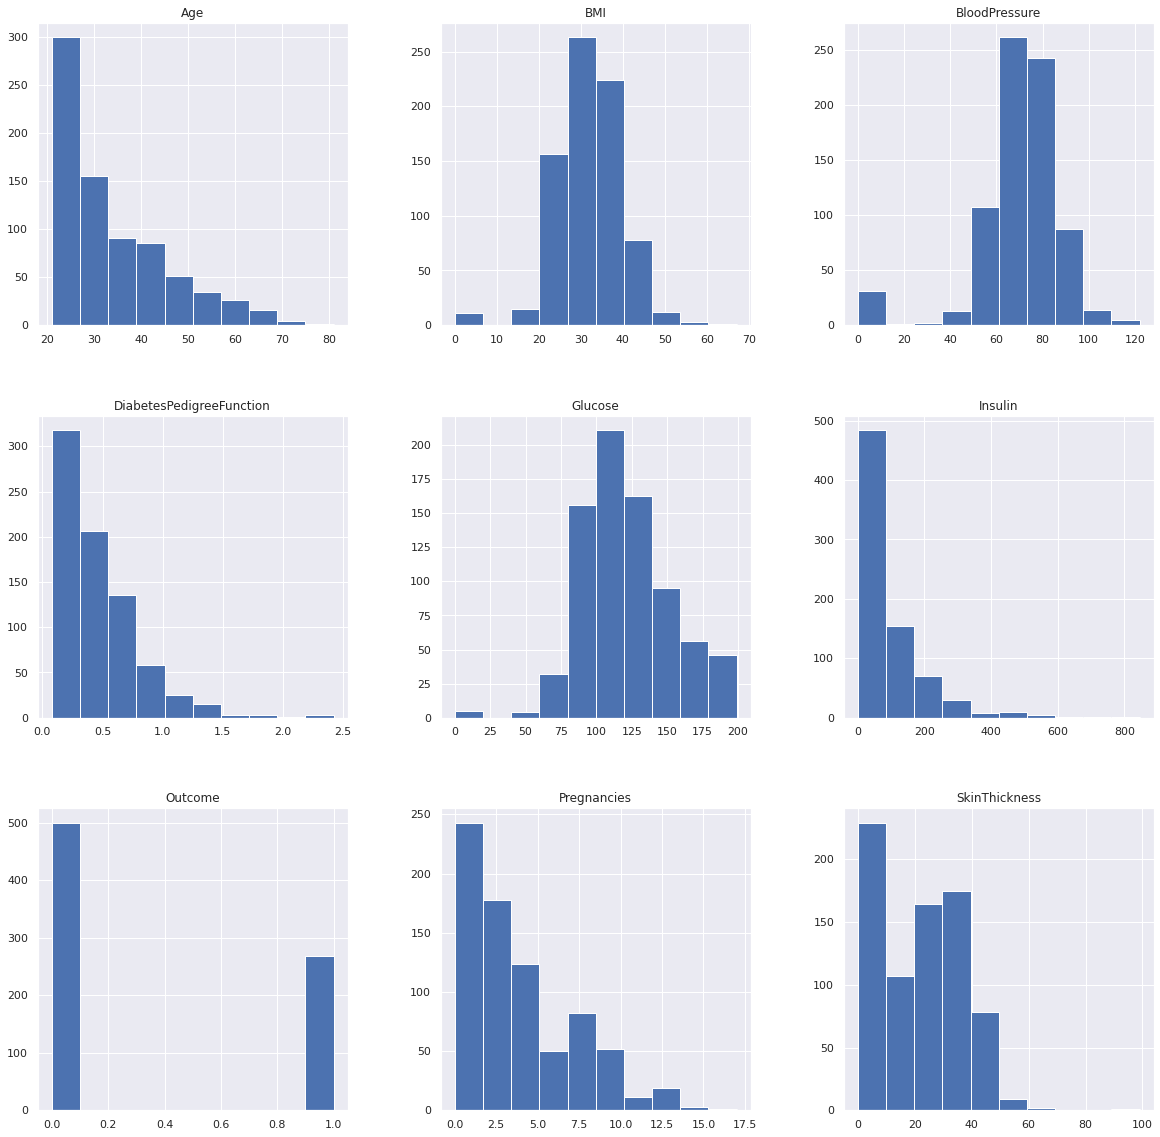

In [35]:
p = df.hist(figsize = (20,20))

In [0]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [0]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [38]:

df.shape
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

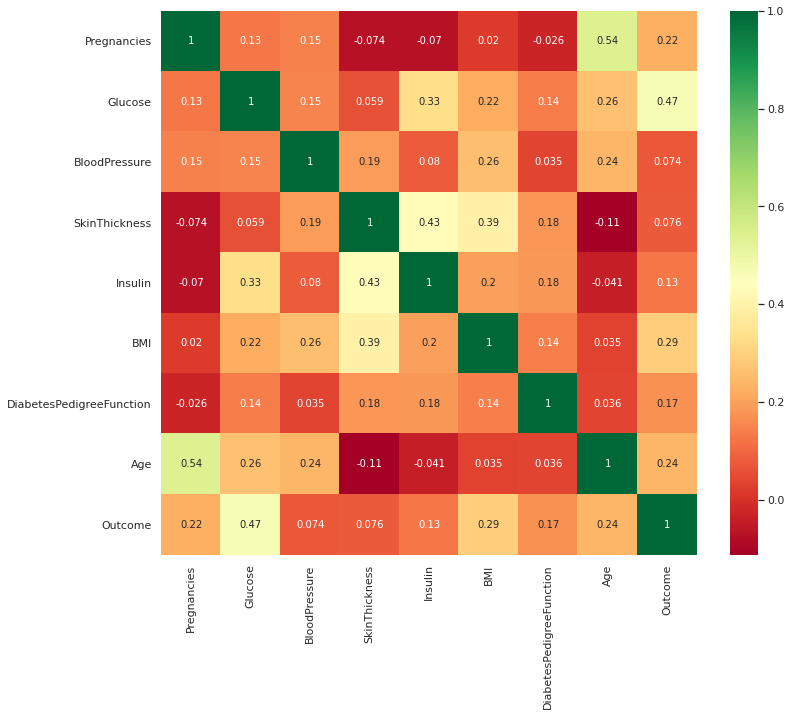

In [39]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn') 

**SCALING AND PREPROCESSING**

In [40]:
#Performing Scaling
sourcevars = df[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
targetvar = df[['Outcome']]
sourcevars.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148,72.0,0.0,33.6,0.627,50.0
1,1.0,85,66.0,0.0,26.6,0.351,31.0
2,8.0,183,64.0,0.0,23.3,0.672,32.0
3,1.0,89,66.0,94.0,28.1,0.167,21.0
4,NaN,137,40.0,168.0,43.1,2.288,NaN


**PERFORMING FEATURE ABLATION**

In [41]:
#Preprocessing Data 
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_1 = pd.DataFrame(scalar.fit_transform(sourcevars))
df_1.columns = [ 'Pregnencies','Glucose', 'BloodPressure', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

frames = [df_1, targetvar]
df = pd.concat(frames,axis =1)

print(df.shape)
df = df.dropna()
print(df.shape)

(768, 8)
(760, 8)


In [42]:
df.head()

,Pregnencies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.636662,0.848324,0.136012,-0.693676,0.203465,0.468492,1.423063,1
1,-0.847975,-1.123396,-0.185114,-0.693676,-0.685177,-0.365061,-0.190210,0
2,1.230517,1.943724,-0.292156,-0.693676,-1.104108,0.604397,-0.105301,1
3,-0.847975,-0.998208,-0.185114,0.122962,-0.494754,-0.920763,-1.039301,0
5,0.339735,-0.153185,0.243054,-0.693676,-0.812126,-0.818079,-0.275119,0


**SPLITTING DATASET INTO TEST AND TRAIN**

In [43]:
#Splitting Dataset
train,test = train_test_split(df, test_size=0.2, random_state = 41)
N = len(train.columns) - 1
print(N)
dfs = np.split(train, np.arange(N, len(df.columns), N), axis=1)
x_train = dfs[0]
y_train = dfs[1]

dfp = np.split(test, np.arange(N, len(df.columns), N), axis=1)
x_test = dfp[0]
y_test = dfp[1]

x_train.shape
x_test.shape


7


(152, 7)

**DEFINING KNN DISTANCE METRICS AND WEIGHTS**

In [0]:
## FUNCTION FOR CHEBYSHEV
def chebyshev_dist(data1,data2):
 return np.max(np.abs(data1-data2))
   
 
 ## FUNCTION FOR EUCLIDEAN
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# Defining our KNN model
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
    weights = {}
    length = testInstance.shape[1]
    #print(" Length is" + str(length))

    for x in range(len(trainingSet)):
        
        
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        #dist = chebyshev_dist(testInstance, trainingSet.iloc[x])

        distances[x] = dist[0]
        weights[x] = 1/dist[0]
    #print(distances)
    #print(weights)  
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
   # print(sorted_d)
    sorted_w = sorted(weights.items(), key=operator.itemgetter(1), reverse = True)
   # print(sorted_w)
    neighbors = []
   ## Taking K sorted distances
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    classVotes = {}
    class_zero = 0
    class_one = 0
    #print(neighbors)
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        #print("Response is")         
        #print(response)
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
        if(response == 0.0):
          class_zero = class_zero + sorted_w[neighbors[x]][1]
        elif(response == 1.0):
          class_one = class_one + sorted_w[neighbors[x]][1]


   # print(classVotes)
    if(class_one>class_zero):
      return 1.0
    else:
      return 0.0
   # sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
   # return(sortedVotes[0][0])
 

predicted =[]
for i in range(len(test)):
  temp = pd.DataFrame(test.values[i])
  temp.head()
  result = knn(train,temp,10)
  predicted.append(result)


**PRINTING CLASSIFICATION REPORT**

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.66      0.94      0.78        96
         1.0       0.62      0.18      0.28        56

    accuracy                           0.66       152
   macro avg       0.64      0.56      0.53       152
weighted avg       0.65      0.66      0.59       152



**ANALYSING RESULT(ROC/AUC)**

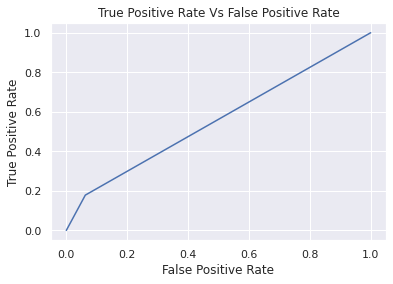

AUC: 0.5580357142857143


In [47]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted, pos_label=0)
# Print ROC curve
plt.plot(tpr,fpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("True Positive Rate Vs False Positive Rate")
plt.show()

# Print AUC
auc = np.trapz(fpr,tpr)
print('AUC:', auc)

**VISUALIZING KNN PREDICTIONS**

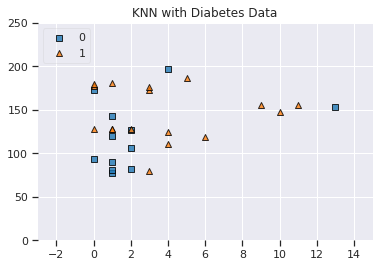

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(10)
knn.fit(x_train,y_train)
value = 20000
width = 20000
plot_decision_regions(sourcevars.values.astype(np.integer), targetvar.values.ravel().astype(np.integer), clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width},
                      X_highlight = x_test.values.astype(np.integer))


plt.title('KNN with Diabetes Data')
plt.xlim([-3,15])
plt.ylim([0,250])
plt.show()